<a href="https://colab.research.google.com/github/NaraineSurya/House-Price-Prediction/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [217]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [218]:
#data = pd.read_csv("/kaggle/input/housing-dataset.csv")
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Preparing the Data




In [219]:
# Getting the dimensions of the data
print(f"Rows and Columns of data is :{housing.shape}")

Rows and Columns of data is :(545, 13)


In [220]:
# Getting the null values of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [221]:
housing.describe(include = 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [222]:
# Checking the null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

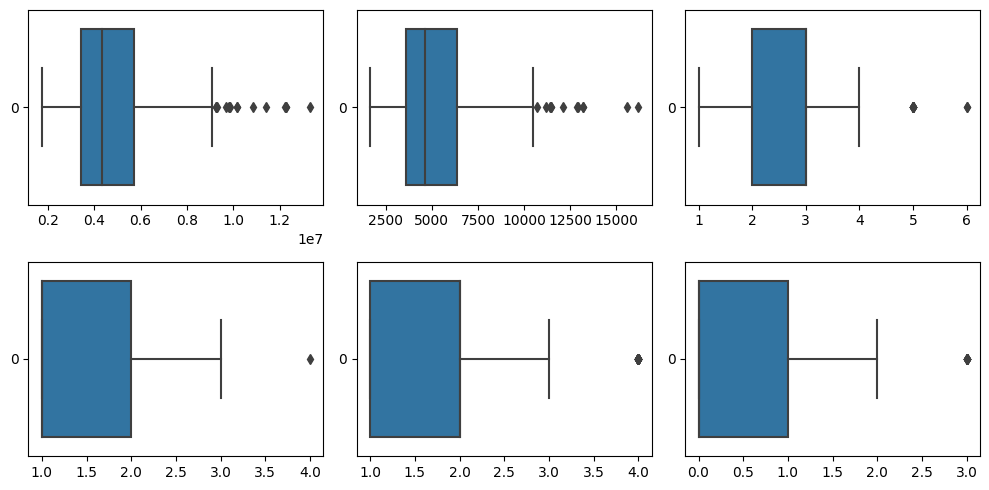

In [223]:
#Outlier Analysis
fig,axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0], orient="h")
plt2 = sns.boxplot(housing['area'], ax = axs[0,1], orient="h")
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2], orient="h")
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1,0], orient="h")
plt5 = sns.boxplot(housing['stories'], ax = axs[1,1], orient="h")
plt6 = sns.boxplot(housing['parking'], ax = axs[1,2], orient="h")
plt.tight_layout()

# Cleaning the Data

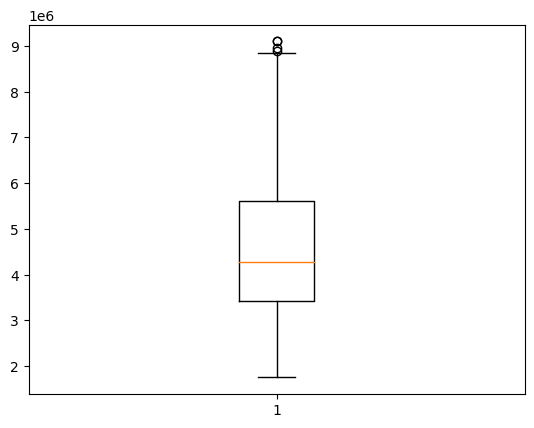

In [224]:
# outlier treatment for price
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]
plt.boxplot(housing.price)
plt.show()

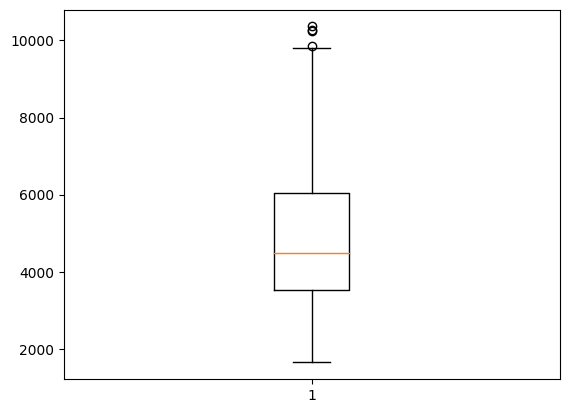

In [225]:
#Outlier Treatment or area
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3-Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]
plt.boxplot(housing.area)
plt.show()


In [226]:
housing = housing.reset_index()

In [227]:
housing.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


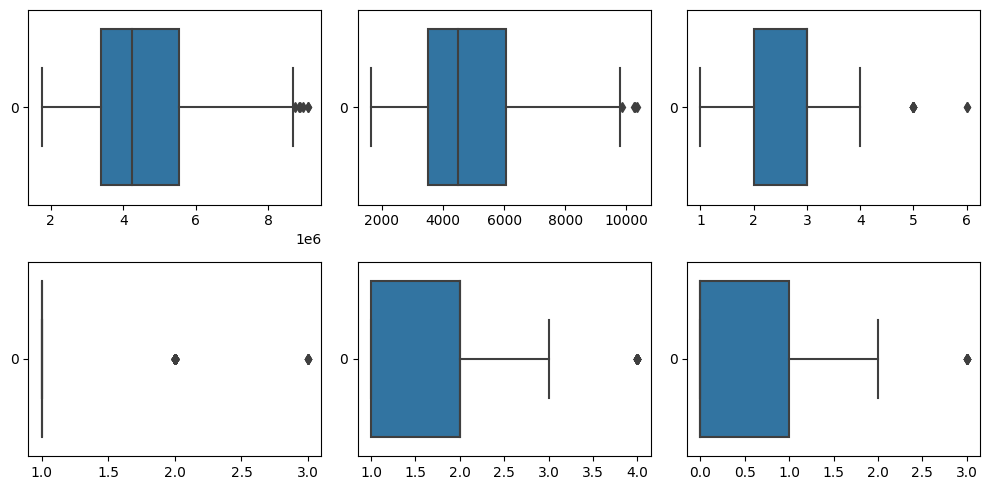

In [228]:
# Outlier Analysis
fig,axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0], orient="h")
plt2 = sns.boxplot(housing['area'], ax = axs[0,1], orient="h")
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2], orient="h")
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1,0], orient="h")
plt5 = sns.boxplot(housing['stories'], ax = axs[1,1], orient="h")
plt6 = sns.boxplot(housing['parking'], ax = axs[1,2], orient="h")
plt.tight_layout()


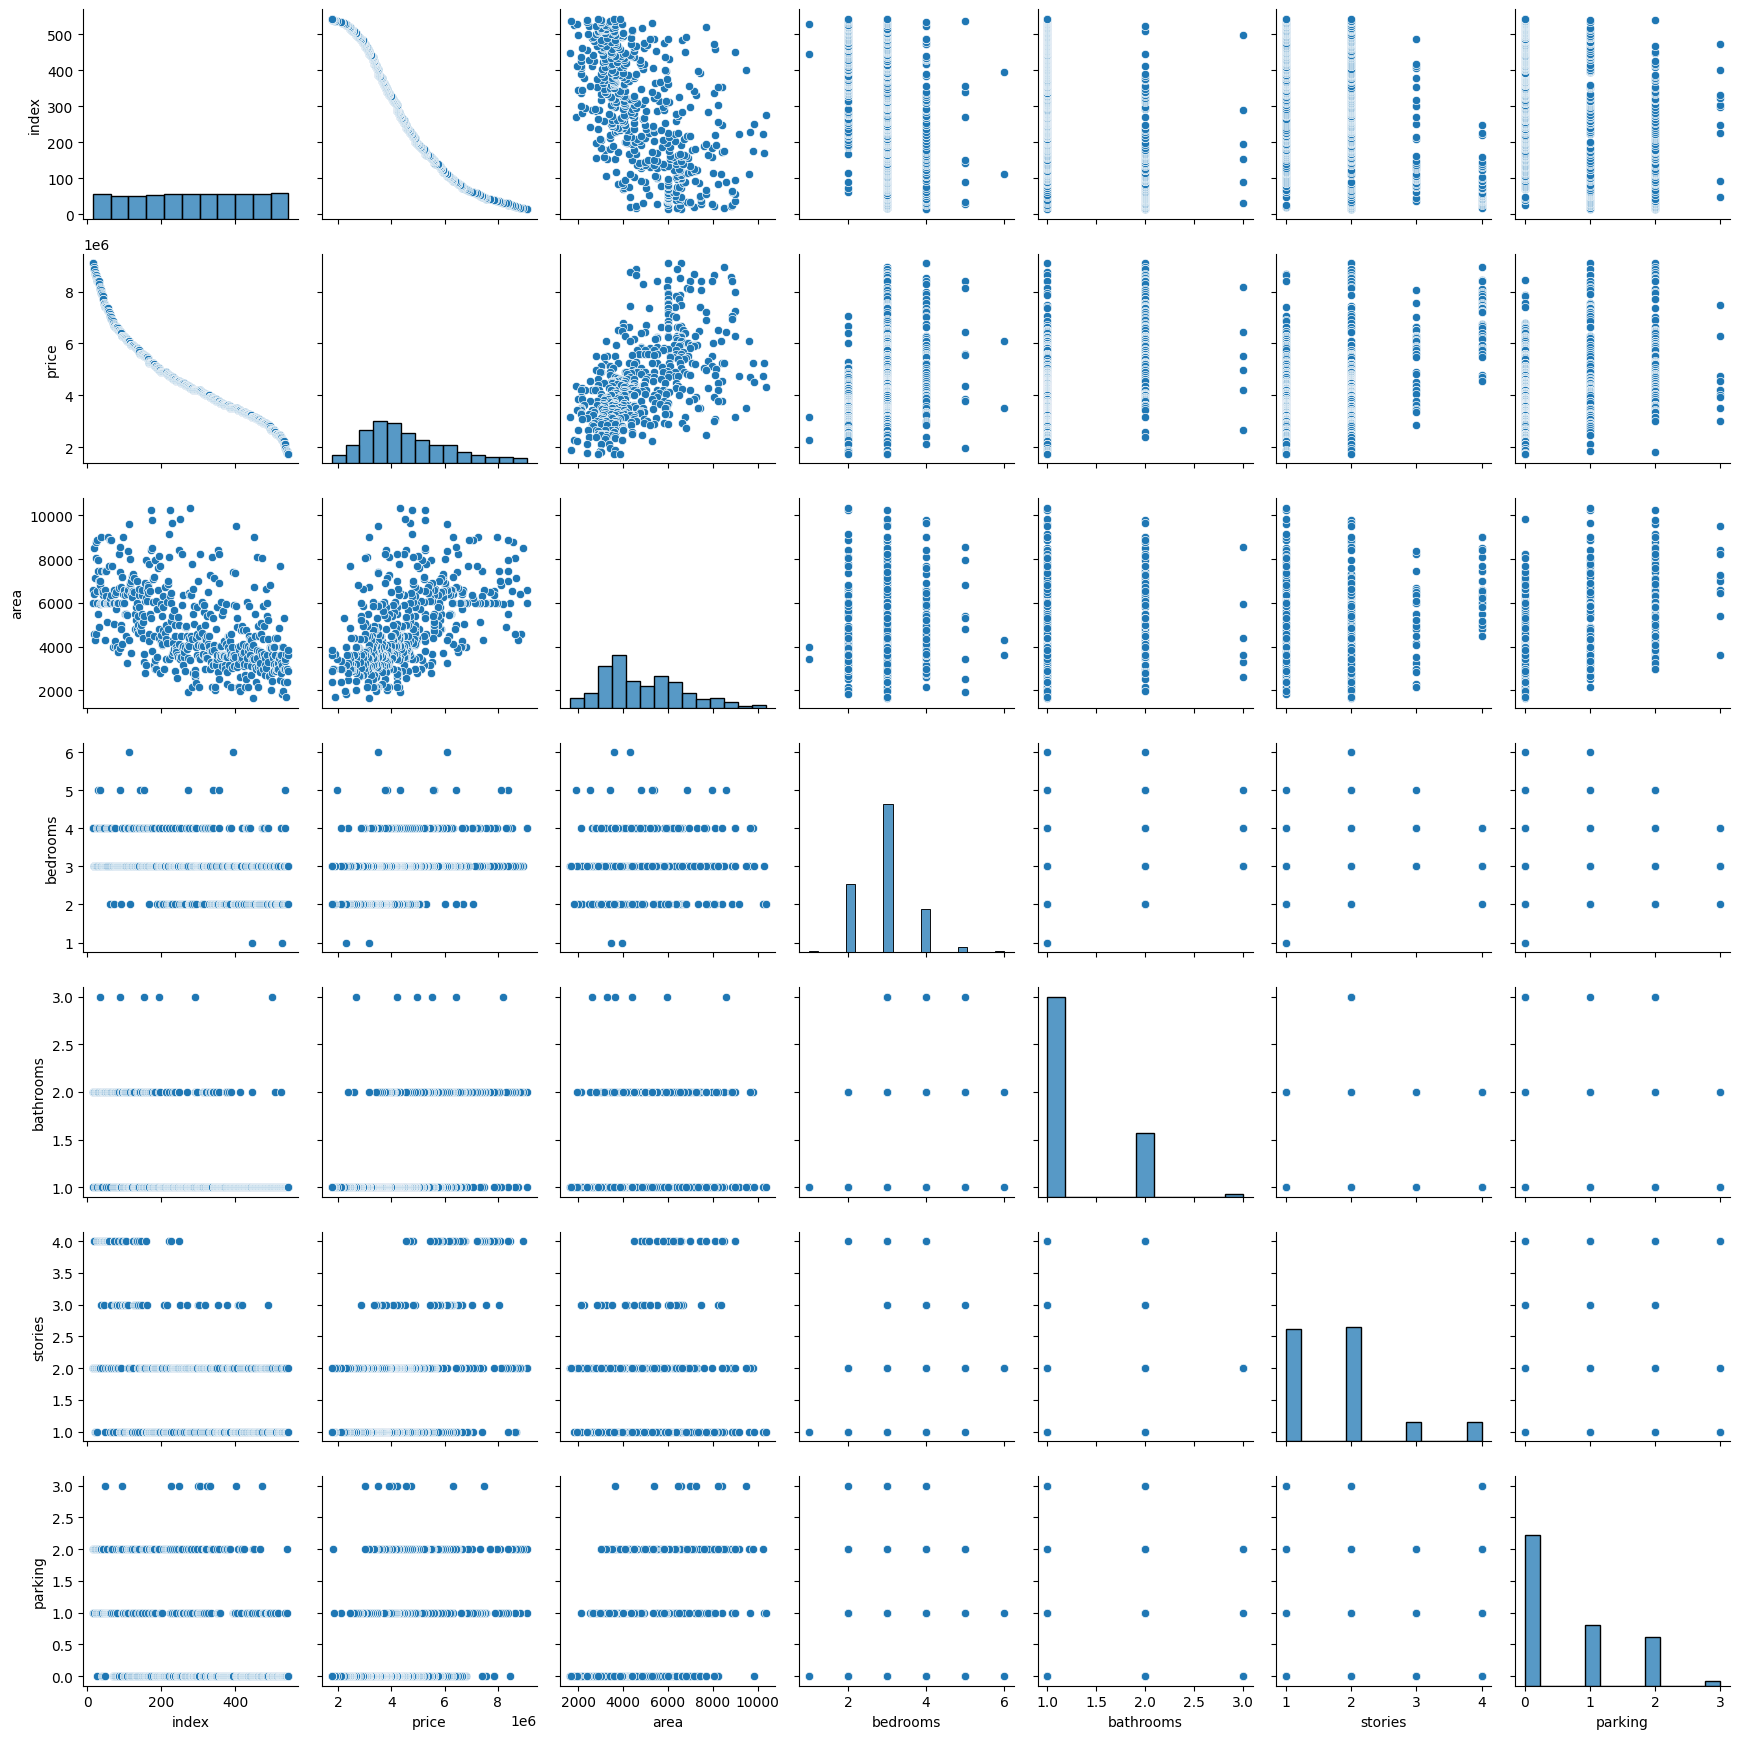

In [229]:
#Pairplot of numeric varialbles
sns.pairplot(housing)
plt.tight_layout()
plt.show()

There are more categorical variables in it .
We must give binary values for the categorical variables






In [230]:
#List of binary variables

binlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x) :
  return x.map({ 'yes': 1 , 'no': 0})

binlist = housing[binlist].apply(binary_map)
binlist.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,1,0,0,0
1,1,1,1,0,1,1
2,1,0,0,0,1,0
3,1,1,0,0,1,0
4,1,0,0,0,1,1


In [231]:
# Removing the categorical variables from the original housing dataframe
housing.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)
housing.head()


,index,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,15,9100000,6000,4,1,2,2,semi-furnished
1,16,9100000,6600,4,2,2,1,unfurnished
2,17,8960000,8500,3,2,4,2,furnished
3,18,8890000,4600,3,2,2,2,furnished
4,19,8855000,6420,3,2,2,1,semi-furnished


In [232]:
# Adding the results to the original housing dataframe
housing = pd.concat([housing, binlist], axis = 1)
housing.head()

,index,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,15,9100000,6000,4,1,2,2,semi-furnished,1,0,1,0,0,0
1,16,9100000,6600,4,2,2,1,unfurnished,1,1,1,0,1,1
2,17,8960000,8500,3,2,4,2,furnished,1,0,0,0,1,0
3,18,8890000,4600,3,2,2,2,furnished,1,1,0,0,1,0
4,19,8855000,6420,3,2,2,1,semi-furnished,1,0,0,0,1,1


In [233]:
# Using pd.get_dummies() to one-hot encode the 'furnishingstatus' column

status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0


In [234]:
# Adding the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)
housing.head()

,index,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
0,15,9100000,6000,4,1,2,2,semi-furnished,1,0,1,0,0,0,0,1,0
1,16,9100000,6600,4,2,2,1,unfurnished,1,1,1,0,1,1,0,0,1
2,17,8960000,8500,3,2,4,2,furnished,1,0,0,0,1,0,1,0,0
3,18,8890000,4600,3,2,2,2,furnished,1,1,0,0,1,0,1,0,0
4,19,8855000,6420,3,2,2,1,semi-furnished,1,0,0,0,1,1,0,1,0


In [235]:
# Removing the 'furnishingstatus' column in dataframe

housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,index,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
0,15,9100000,6000,4,1,2,2,1,0,1,0,0,0,0,1,0
1,16,9100000,6600,4,2,2,1,1,1,1,0,1,1,0,0,1
2,17,8960000,8500,3,2,4,2,1,0,0,0,1,0,1,0,0
3,18,8890000,4600,3,2,2,2,1,1,0,0,1,0,1,0,0
4,19,8855000,6420,3,2,2,1,1,0,0,0,1,1,0,1,0


# Splitting of Dataset into train and test


In [236]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
x_train,x_test = train_test_split(housing,test_size = 0.2,random_state = 100)


# Model Building

In [237]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply Normalization for higher values and except yes or no and dummy variables

norm_vars = ['price', 'area' ,'bedrooms','bathrooms','stories','parking']
x_train[norm_vars] = scaler.fit_transform(x_train[norm_vars])
x_test[norm_vars] = scaler.transform(x_test[norm_vars])


In [238]:
x_train.head()

,index,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
412,440,0.201905,0.224018,0.6,0.0,0.333333,0.000000,1,0,1,0,0,0,0,0,1
332,359,0.266667,0.219400,0.4,0.0,0.000000,0.333333,1,0,0,0,0,0,0,0,1
423,451,0.190476,0.583141,0.2,0.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0
387,415,0.223810,0.356236,0.4,0.0,0.333333,0.333333,1,1,1,0,1,0,1,0,0
153,177,0.475238,0.502309,0.4,0.0,0.000000,0.000000,1,0,1,0,0,1,0,1,0


In [240]:
x_train.describe()

,index,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.00000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,284.440678,0.380071,0.360160,0.387893,0.128329,0.259080,0.217111,0.871671,0.162228,0.35109,0.046005,0.292978,0.200969,0.227603,0.457627,0.314770
std,151.272690,0.213500,0.200796,0.149915,0.229492,0.280384,0.281482,0.334862,0.369107,0.47789,0.209750,0.455681,0.401211,0.419793,0.498806,0.464987
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,0.227619,0.207852,0.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,294.000000,0.333333,0.306236,0.400000,0.000000,0.333333,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,414.000000,0.514286,0.496536,0.400000,0.000000,0.333333,0.333333,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,544.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


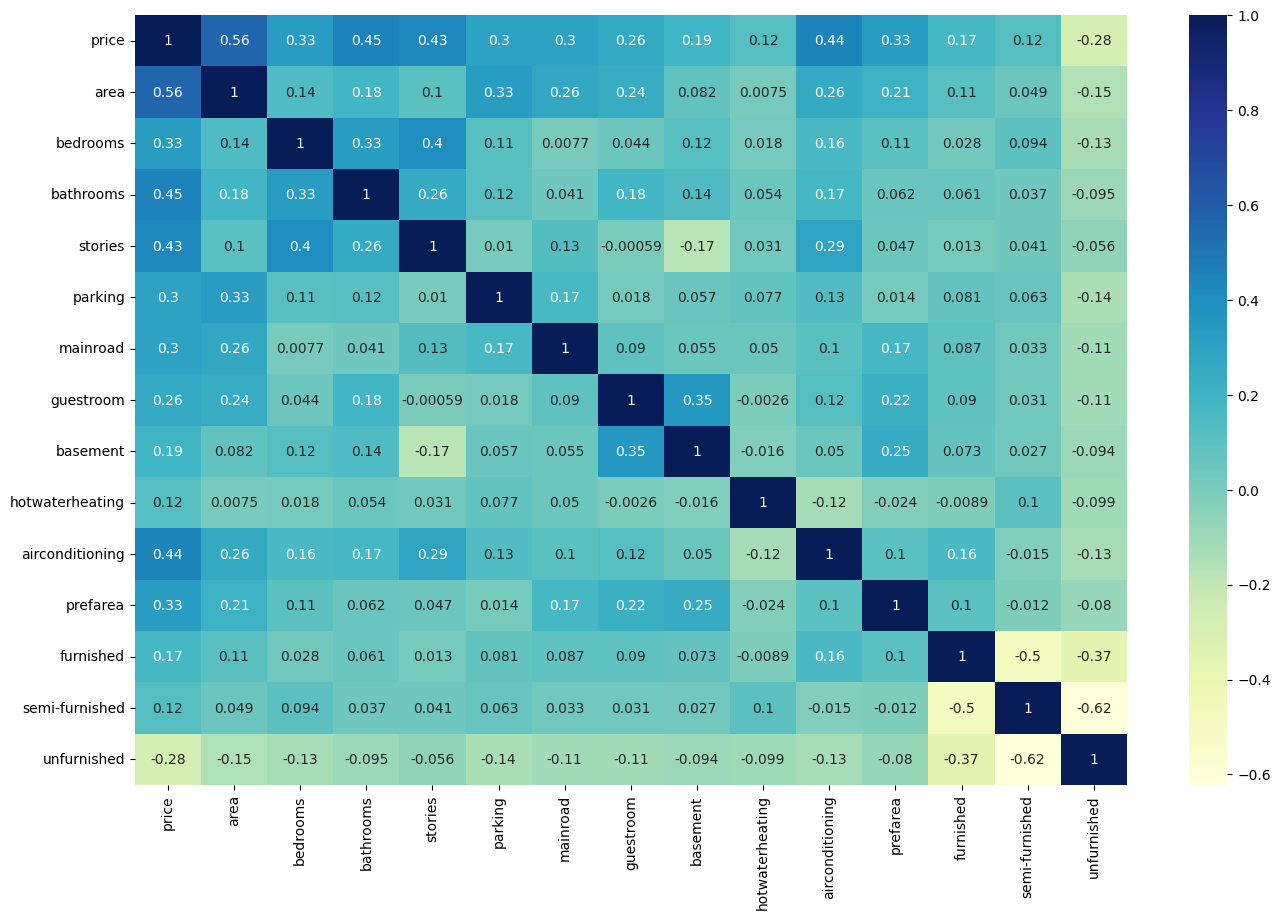

In [241]:
# Checking the correlation between the variables

x_train.drop('index', axis =1, inplace = True)
plt.figure(figsize = (16, 10))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [242]:
  # Assigning the input and output variables

y_train = x_train.pop('price')
x_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
412,0.224018,0.6,0.0,0.333333,0.000000,1,0,1,0,0,0,0,0,1
332,0.219400,0.4,0.0,0.000000,0.333333,1,0,0,0,0,0,0,0,1
423,0.583141,0.2,0.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0
387,0.356236,0.4,0.0,0.333333,0.333333,1,1,1,0,1,0,1,0,0
153,0.502309,0.4,0.0,0.000000,0.000000,1,0,1,0,0,1,0,1,0


In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE #RFE stands for Recursive Feature Elimination

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [244]:
model.coef_

array([3.44859994e-01, 1.05113443e-02, 2.05770536e-01, 2.03319242e-01,
       6.97200949e-02, 5.22218875e-02, 1.78059402e-02, 4.75238045e-02,
       1.08584369e-01, 9.37275396e-02, 8.67741228e-02, 1.90739520e+13,
       1.90739520e+13, 1.90739520e+13])

In [245]:
rfe = RFE(model,n_features_to_select=6)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [246]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 9),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('parking', False, 2),
 ('mainroad', False, 4),
 ('guestroom', False, 8),
 ('basement', False, 5),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('prefarea', True, 1),
 ('furnished', False, 6),
 ('semi-furnished', False, 7),
 ('unfurnished', False, 3)]

Here it shows the features that are ordered based on the ranking and support of the dataset

In [247]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

These columns are the important features in the dataset

In [248]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [249]:
x_train_rfe = x_train[col]
x_train_rfe.head()

,area,bathrooms,stories,hotwaterheating,airconditioning,prefarea
412,0.224018,0.0,0.333333,0,0,0
332,0.219400,0.0,0.000000,0,0,0
423,0.583141,0.0,0.000000,0,0,0
387,0.356236,0.0,0.333333,0,1,0
153,0.502309,0.0,0.000000,0,0,1


**Residual** **Analysis**

In [264]:
y_pred_train = model.predict(x_train_rfe)

In [265]:
res = y_pred_train - y_train


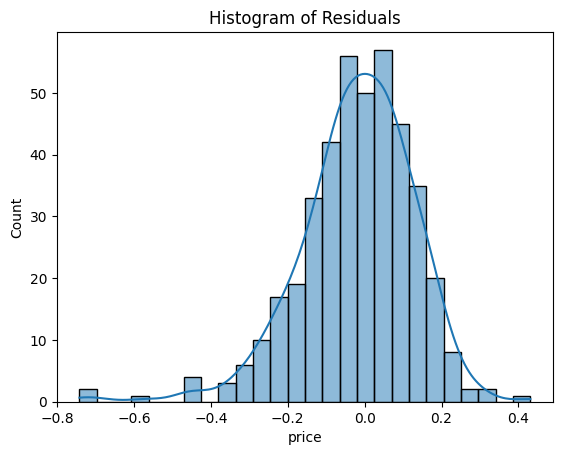

In [266]:
import seaborn as sns
sns.histplot(res, kde=True)
plt.title("Histogram of Residuals")
plt.show()



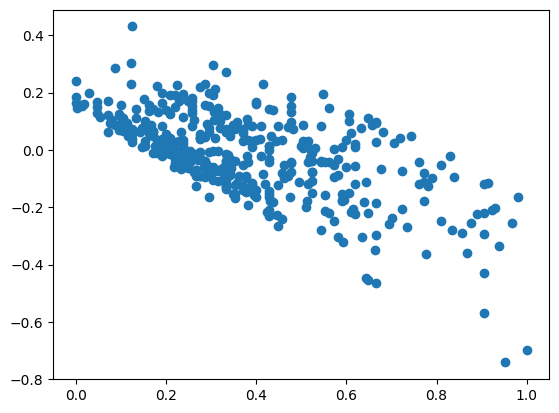

In [267]:
plt.scatter(y_train,res)
plt.show()

Checking the loss values using cost function MSE

In [268]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

0.021874735354713182

In [269]:
y_test = x_test.pop('price')
y_test.head()

KeyError: ignored

,index,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
217,244,0.418014,0.4,0.0,0.333333,0.000000,1,1,1,0,0,1,0,1,0
260,287,0.438799,0.4,0.0,0.333333,0.000000,1,0,0,0,1,0,0,0,1
142,166,0.704388,0.4,0.0,0.000000,0.666667,1,0,1,0,1,1,0,0,1
152,176,0.787529,0.4,0.0,0.000000,0.666667,1,0,0,0,1,0,1,0,0
255,282,0.054850,0.4,0.0,0.333333,0.000000,0,1,1,0,1,0,0,0,1


In [260]:
x_test_rfe = x_test[col]
x_test_rfe.head()

,area,bathrooms,stories,hotwaterheating,airconditioning,prefarea
217,0.418014,0.0,0.333333,0,0,1
260,0.438799,0.0,0.333333,0,1,0
142,0.704388,0.0,0.000000,0,1,1
152,0.787529,0.0,0.000000,0,1,0
255,0.054850,0.0,0.333333,0,1,0


In [262]:
model = LinearRegression()
model.fit(x_test_rfe,y_test)

LinearRegression()

In [270]:
y_pred_test = model.predict(x_test_rfe)

In [272]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.6232632130983858

In [273]:
model.coef_

array([ 0.24955032,  0.3207911 ,  0.14801176, -0.04356945,  0.18192665,
        0.05503031])

In [274]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

0.019886990356452028

We can see that the equation of our best fitted line is:

price=0.25×area+0.32×bathrooms+0.14×stories+(-0.0430)×airconditioning+0.18×parking+0.055×prefarea

In [293]:
# Getting the cost funcion values of training and testing data

print(f"The cost function value of training data: {mse_train}")
print(f"The cost function value of testing data: {mse_test}")

The cost function value of training data: 0.021874735354713182
The cost function value of testing data: 0.019886990356452028


The model is well generalized over the dataset

In [290]:
y_test.shape
y_test_matrix = y_test.values.reshape(-1,1)
y_test_matrix[:5]

array([[0.38095238],
       [0.33333333],
       [0.48571429],
       [0.47619048],
       [0.34285714]])

In [291]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':y_pred_test.flatten()})
#flatten toget single axis of data (1 dimension only)


In [292]:
dframe.head(15)

,actual,Predicted
0,0.380952,0.337849
1,0.333333,0.469932
2,0.485714,0.541903
3,0.476190,0.507621
4,0.342857,0.374118
5,0.785714,0.743411
6,0.238095,0.249619
7,0.360952,0.271292
8,0.419048,0.564211
9,0.571429,0.576613
